### Importing Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading dataset**

In [2]:
email = pd.read_csv(r"C:\Users\Vikas\OneDrive\Desktop\CipherByte\Spam Email Detection - spam.csv")

**Reading top 5 rows**

In [3]:
email.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning

**Droping all Unnamed Columns**

In [4]:
email = email.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)

In [5]:
email.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
email.duplicated().sum()

409

In [8]:
email = email.drop_duplicates()

In [9]:
email.duplicated().sum()

0

In [10]:
email.isnull().sum()

v1    0
v2    0
dtype: int64

In [11]:
email.shape

(5163, 2)

**Changing Column name**

In [12]:
email = email.rename(columns = {'v1':'Category','v2':'Message'})

In [13]:
email.columns

Index(['Category', 'Message'], dtype='object')

In [14]:
email['Category'].value_counts()

ham     4516
spam     647
Name: Category, dtype: int64

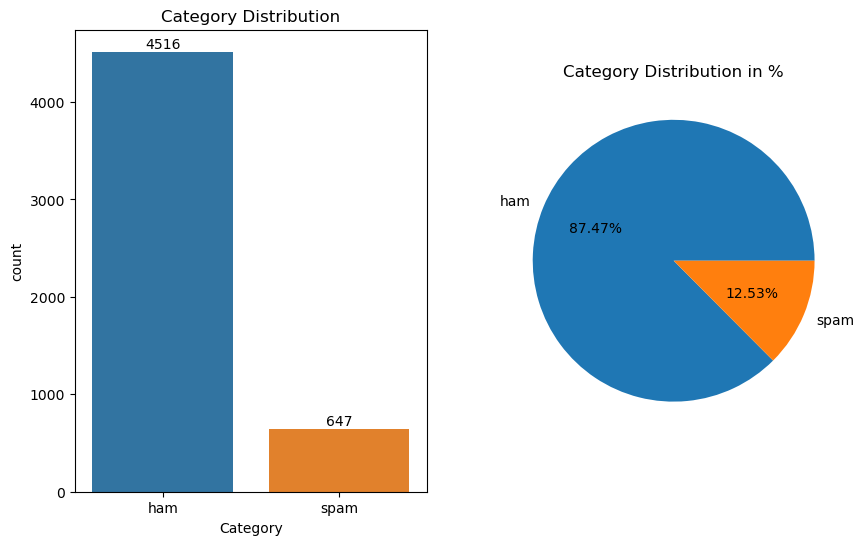

In [15]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
ax = sns.countplot(email['Category'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Category Distribution')
    
plt.subplot(1,2,2)
plt.pie(email['Category'].value_counts(), autopct='%.2f%%', labels=email['Category'].value_counts().index)
plt.title('Category Distribution in %')
plt.show()

In [16]:
#Descriptive Summary of the dataset
email.describe()

,Category,Message
count,5163,5163
unique,2,5163
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


# Encoding

**Converting ham as a 0 and spam as a 1**

In [17]:
email['Category'] = email['Category'].replace({'ham':0,'spam':1})

**Spreading data into X & y**

In [18]:
X = email['Message']
y = email['Category']

**Spliting the data into Training & Testing (80:20)% ratio**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [21]:
print(X_train.shape,X_test.shape)

(4130,) (1033,)


In [22]:
print(y_train.shape,y_test.shape)

(4130,) (1033,)


**Feature Extraction**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

X_train_feature=feature_extraction.fit_transform(X_train)

X_test_feature=feature_extraction.transform(X_test)

In [25]:
print(X_train_feature)

  (0, 2275)	0.5678711631491277
  (0, 2926)	0.5958562612973985
  (0, 1429)	0.5678711631491277
  (1, 4641)	0.23272978821640422
  (1, 6462)	0.3843118763734655
  (1, 4121)	0.40325104123652306
  (1, 4851)	0.40325104123652306
  (1, 1093)	0.40325104123652306
  (1, 7208)	0.40325104123652306
  (1, 2513)	0.3843118763734655
  (2, 21)	0.5872602508203881
  (2, 6587)	0.29402226212143834
  (2, 6408)	0.39453362209078535
  (2, 3904)	0.3515068798238112
  (2, 4322)	0.43062910150480166
  (2, 6045)	0.32252289623682295
  (3, 4146)	0.8777979174884418
  (3, 3029)	0.47903112221749694
  (4, 1877)	0.49618585953403027
  (4, 7064)	0.35290810594148114
  (4, 4790)	0.5609168661928753
  (4, 6194)	0.5609168661928753
  (5, 6567)	0.312350357681148
  (5, 3443)	0.3222737698903717
  (5, 4651)	0.3350672733249521
  :	:
  (4127, 6625)	0.253533103370992
  (4127, 6538)	0.2610994675835094
  (4127, 2408)	0.33163615996189844
  (4128, 4507)	0.6579946951262893
  (4128, 4989)	0.6445326042958601
  (4128, 5748)	0.389385032050871
  (4129

In [26]:
print(X_test_feature)

  (0, 7169)	0.5306430559824854
  (0, 5539)	0.48344166396799687
  (0, 2568)	0.6962055046302229
  (1, 7305)	0.2256437120723279
  (1, 6258)	0.3167970051834957
  (1, 5807)	0.3836344100022317
  (1, 5625)	0.31211504968570924
  (1, 5323)	0.352832698065501
  (1, 4863)	0.30045624370154356
  (1, 4524)	0.1981351714482904
  (1, 4068)	0.18245667970650484
  (1, 3697)	0.1645189730114099
  (1, 3504)	0.30401313968776766
  (1, 3118)	0.18269753383034812
  (1, 2372)	0.2813133377489786
  (1, 1636)	0.29122927419203964
  (2, 4561)	0.7388984024413582
  (2, 1814)	0.36492292278067273
  (2, 1389)	0.5664454177578101
  (3, 3906)	0.8130137675238901
  (3, 1561)	0.5822444622464089
  (4, 7239)	0.2122098166739925
  (4, 5710)	0.2062364695602675
  (4, 5677)	0.18844070762942228
  (4, 5539)	0.1557384113200132
  :	:
  (1030, 1762)	0.24934675108968193
  (1031, 7264)	0.16148754577159824
  (1031, 7180)	0.19257113078608845
  (1031, 7152)	0.17854983432743968
  (1031, 7090)	0.15793101442520793
  (1031, 6767)	0.14500655178261151
 

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()

In [29]:
lr.fit(X_train_feature,y_train)

LogisticRegression()

**Model Evalution**

In [30]:
y_pred = lr.predict(X_test_feature)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [32]:
accuracy = accuracy_score(y_pred, y_test)

In [33]:
accuracy

0.9515972894482091

In [34]:
print(confusion_matrix(y_pred, y_test))

[[899  49]
 [  1  84]]


In [35]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       948
           1       0.63      0.99      0.77        85

    accuracy                           0.95      1033
   macro avg       0.82      0.97      0.87      1033
weighted avg       0.97      0.95      0.96      1033

